# Sample efficiency
Test for sample efficiency of curriculum learning.
Init second phase ASAP
Transfer samples from first to second phase
- first ground-truth
- then with learned function

In [7]:
import wandb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
api = wandb.Api()
project = "kilian/DRL-Traj-Planner"

def extract_data(run_ids, num_samples=30_000):
    episode_success = []
    episode_lengths = []
    episode_rewards = []

    for run_id in run_ids:
        run = api.run(f'{project}/{run_id}')
        run_data = run.history(samples=num_samples)
        success_rate = run_data['train/episode_success']
        success_rate = [rate for rate in success_rate if not np.isnan(rate)]
        # episode_success.extend(success_rate)

        episode_length = run_data['train/episode_length']
        episode_length = [length for length in episode_length if not np.isnan(length)]
        # episode_lengths.extend(episode_length)

        episode_reward = run_data['train/episode_reward']
        episode_reward = [reward for reward in episode_reward if not np.isnan(reward)]
        # episode_rewards.extend(episode_reward)

        episode_success.append(np.array(success_rate))
        episode_lengths.append(np.array(episode_length))
        episode_rewards.append(np.array(episode_reward))

    return episode_success, episode_lengths, episode_rewards

def plot_data(data, ax):
    df = pd.DataFrame({'Success Rate': data[0], 'Episode Length': data[1], 'Episode Reward': data[2]})
    df.plot(ax=ax, x='Success Rate', y='Episode Length', kind='bar', title='Base Data', grid=True)

In [54]:
only_base_runs = [
    "1fli79ns",
    "aaijlmc7",
    "g2y8ws1h"
]
w_constrains_runs = [
    "hwasfakc",
    "9l665z8h",
    "5jqu47bc",
]
speed_base_runs = [
    "xw60b8l9",
    "hmhe96k1",
    "9fom418z"
]

In [55]:
base_data = extract_data(only_base_runs)
constraints_data = extract_data(w_constrains_runs)
speed_data = extract_data(speed_base_runs)

In [56]:
base_data = [np.stack(d, axis=0) for d in base_data]
constraints_data = [np.stack(d, axis=0) for d in constraints_data]
speed_data = [np.stack(d, axis=0) for d in speed_data]

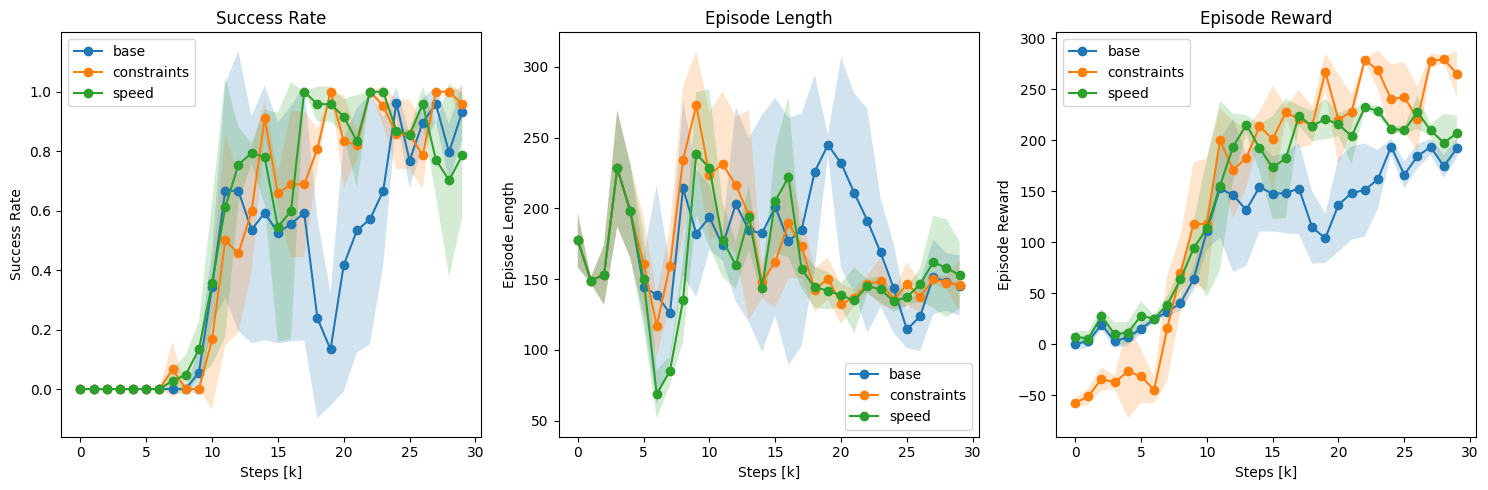

In [57]:
import seaborn as sns

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot success data
axs[0].plot(np.arange(30), base_data[0].mean(0), marker='o', label='base')
axs[0].fill_between(np.arange(30), base_data[0].mean(0) - base_data[0].std(0), base_data[0].mean(0) + base_data[0].std(0), alpha=0.2)
axs[0].plot(np.arange(30), constraints_data[0].mean(0), marker='o', label='constraints')
axs[0].fill_between(np.arange(30), constraints_data[0].mean(0) - constraints_data[0].std(0), constraints_data[0].mean(0) + constraints_data[0].std(0), alpha=0.2)
axs[0].plot(np.arange(30), speed_data[0].mean(0), marker='o', label='speed')
axs[0].fill_between(np.arange(30), speed_data[0].mean(0) - speed_data[0].std(0), speed_data[0].mean(0) + speed_data[0].std(0), alpha=0.2)
axs[0].set_xlabel('Steps [k]')
axs[0].set_ylabel('Success Rate')
axs[0].set_title('Success Rate')
axs[0].legend()

# Plot length data
axs[1].plot(np.arange(30), base_data[1].mean(0), marker='o', label='base')
axs[1].fill_between(np.arange(30), base_data[1].mean(0) - base_data[1].std(0), base_data[1].mean(0) + base_data[1].std(0), alpha=0.2)
axs[1].plot(np.arange(30), constraints_data[1].mean(0), marker='o', label='constraints')
axs[1].fill_between(np.arange(30), constraints_data[1].mean(0) - constraints_data[1].std(0), constraints_data[1].mean(0) + constraints_data[1].std(0), alpha=0.2)
axs[1].plot(np.arange(30), speed_data[1].mean(0), marker='o', label='speed')
axs[1].fill_between(np.arange(30), speed_data[1].mean(0) - speed_data[1].std(0), speed_data[1].mean(0) + speed_data[1].std(0), alpha=0.2)
axs[1].set_xlabel('Steps [k]')
axs[1].set_ylabel('Episode Length')
axs[1].set_title('Episode Length')
axs[1].legend()

# Plot reward data
axs[2].plot(np.arange(30), base_data[2].mean(0), marker='o', label='base')
axs[2].fill_between(np.arange(30), base_data[2].mean(0) - base_data[2].std(0), base_data[2].mean(0) + base_data[2].std(0), alpha=0.2)
axs[2].plot(np.arange(30), constraints_data[2].mean(0), marker='o', label='constraints')
axs[2].fill_between(np.arange(30), constraints_data[2].mean(0) - constraints_data[2].std(0), constraints_data[2].mean(0) + constraints_data[2].std(0), alpha=0.2)
axs[2].plot(np.arange(30), speed_data[2].mean(0), marker='o', label='speed')
axs[2].fill_between(np.arange(30), speed_data[2].mean(0) - speed_data[2].std(0), speed_data[2].mean(0) + speed_data[2].std(0), alpha=0.2)
axs[2].set_xlabel('Steps [k]')
axs[2].set_ylabel('Episode Reward')
axs[2].set_title('Episode Reward')
axs[2].legend()

plt.tight_layout()
plt.show()

wc=wg=1
In this reward setting it seems like both are equally sample efficient. That might be because the distance term is effectively higher than the others

In [3]:
100 / (300 * 4)

0.08333333333333333

## Experiment 2 - equal reward weights
What happens when all rewards have equal importance and have weight 0.15? The value is chosen as indicated below to ensure that a successful run with 150 steps has higher reward than a run with 300 steps

In [5]:
# x * 150 + 100 < 300 * x
# 100 < 150 * x
# 100 / 150 < x
# 2/3 < x
print(2/3/4)

0.16666666666666666


In [13]:
only_base_runs = [
    "v8paa4sb",
    "wvqrgx1x",
    "f9yeu8dp"
]
w_constrains_runs = [
    "6ppkkw96",
    "ij6symmw",
    "8xo34v8y",
]
speed_base_runs = [
    "u3ohz90z",
    "4rqil8df",
    "jdgb5vr5",
]

In [14]:
base_data = extract_data(only_base_runs)
constraints_data = extract_data(w_constrains_runs)
speed_data = extract_data(speed_base_runs)

base_data = [np.stack(d, axis=0) for d in base_data]
constraints_data = [np.stack(d, axis=0) for d in constraints_data]
speed_data = [np.stack(d, axis=0) for d in speed_data]

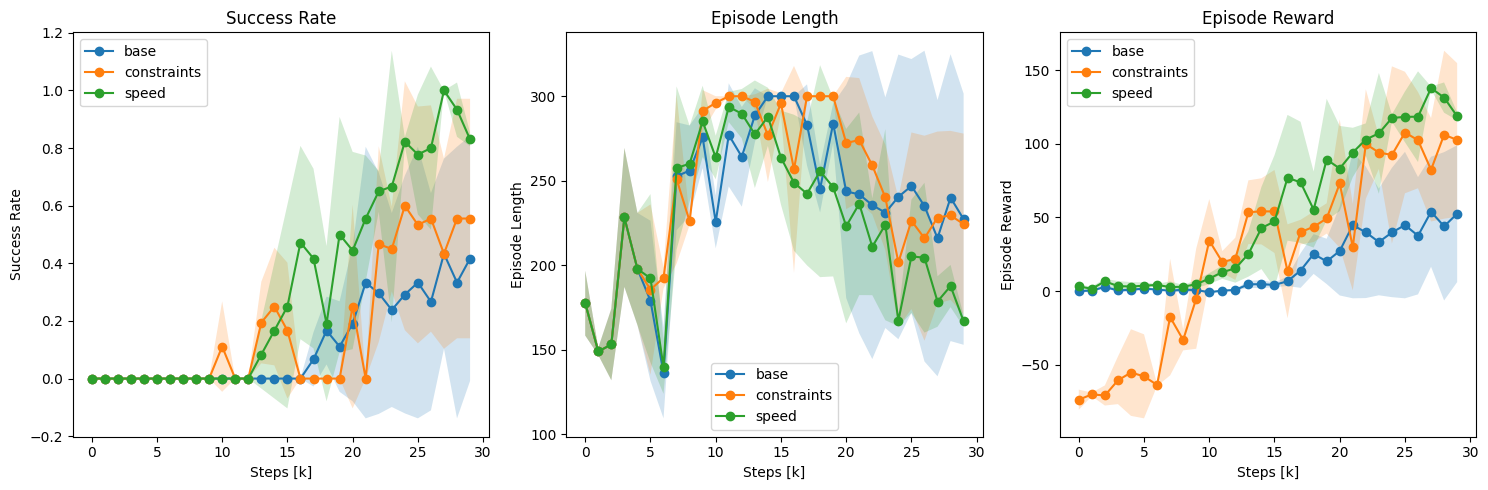

In [15]:
import seaborn as sns

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot success data
axs[0].plot(np.arange(30), base_data[0].mean(0), marker='o', label='base')
axs[0].fill_between(np.arange(30), base_data[0].mean(0) - base_data[0].std(0), base_data[0].mean(0) + base_data[0].std(0), alpha=0.2)
axs[0].plot(np.arange(30), constraints_data[0].mean(0), marker='o', label='constraints')
axs[0].fill_between(np.arange(30), constraints_data[0].mean(0) - constraints_data[0].std(0), constraints_data[0].mean(0) + constraints_data[0].std(0), alpha=0.2)
axs[0].plot(np.arange(30), speed_data[0].mean(0), marker='o', label='speed')
axs[0].fill_between(np.arange(30), speed_data[0].mean(0) - speed_data[0].std(0), speed_data[0].mean(0) + speed_data[0].std(0), alpha=0.2)
axs[0].set_xlabel('Steps [k]')
axs[0].set_ylabel('Success Rate')
axs[0].set_title('Success Rate')
axs[0].legend()

# Plot length data
axs[1].plot(np.arange(30), base_data[1].mean(0), marker='o', label='base')
axs[1].fill_between(np.arange(30), base_data[1].mean(0) - base_data[1].std(0), base_data[1].mean(0) + base_data[1].std(0), alpha=0.2)
axs[1].plot(np.arange(30), constraints_data[1].mean(0), marker='o', label='constraints')
axs[1].fill_between(np.arange(30), constraints_data[1].mean(0) - constraints_data[1].std(0), constraints_data[1].mean(0) + constraints_data[1].std(0), alpha=0.2)
axs[1].plot(np.arange(30), speed_data[1].mean(0), marker='o', label='speed')
axs[1].fill_between(np.arange(30), speed_data[1].mean(0) - speed_data[1].std(0), speed_data[1].mean(0) + speed_data[1].std(0), alpha=0.2)
axs[1].set_xlabel('Steps [k]')
axs[1].set_ylabel('Episode Length')
axs[1].set_title('Episode Length')
axs[1].legend()

# Plot reward data
axs[2].plot(np.arange(30), base_data[2].mean(0), marker='o', label='base')
axs[2].fill_between(np.arange(30), base_data[2].mean(0) - base_data[2].std(0), base_data[2].mean(0) + base_data[2].std(0), alpha=0.2)
axs[2].plot(np.arange(30), constraints_data[2].mean(0), marker='o', label='constraints')
axs[2].fill_between(np.arange(30), constraints_data[2].mean(0) - constraints_data[2].std(0), constraints_data[2].mean(0) + constraints_data[2].std(0), alpha=0.2)
axs[2].plot(np.arange(30), speed_data[2].mean(0), marker='o', label='speed')
axs[2].fill_between(np.arange(30), speed_data[2].mean(0) - speed_data[2].std(0), speed_data[2].mean(0) + speed_data[2].std(0), alpha=0.2)
axs[2].set_xlabel('Steps [k]')
axs[2].set_ylabel('Episode Reward')
axs[2].set_title('Episode Reward')
axs[2].legend()

plt.tight_layout()
plt.show()

# Experiment 2 - speed curriculum vs base
This experiments establishs a ground-truth baseline to investigate if a reward curriculum can help for sample efficiency. For this, we train a policy for 30k steps on a base reward, but we already record the complete reward. Then, after 30k steps we replace the rewards of each sample with the full one, thus not loosing the accumulated replay buffer. The question we are trying to answer is if this allow for more sample efficient learning compared to training on the whole reward from beginning.

In [46]:
normal_runs = [
    "xp4tqr1t",
    "kpp9meo6",
    "fbjly42w",
]
speed_runs = [
    "23waqaq4",
    "xw1xl3go",
    "gjh1lzkv",
]
# more_iter_after_cr_runs = [
#     "knr19x7q",
#     "utyc8eig",
#     "ob2nc481",
# ]
more_iter_after_cr_runs = [
    "gte75lkf",
    "gtsmycp2",
    "u2s7irec",
]
early_cr_runs = [
    "atwr4bkx",
]

In [47]:
normal_data = extract_data(normal_runs, num_samples=50_000)
speed_data = extract_data(speed_runs, num_samples=50_000)
more_iter_after_cr_data = extract_data(more_iter_after_cr_runs, num_samples=50_000)

normal_data = [np.stack(d, axis=0) for d in normal_data]
speed_data = [np.stack(d, axis=0) for d in speed_data]
more_iter_after_cr_data = [np.stack(d, axis=0) for d in more_iter_after_cr_data]

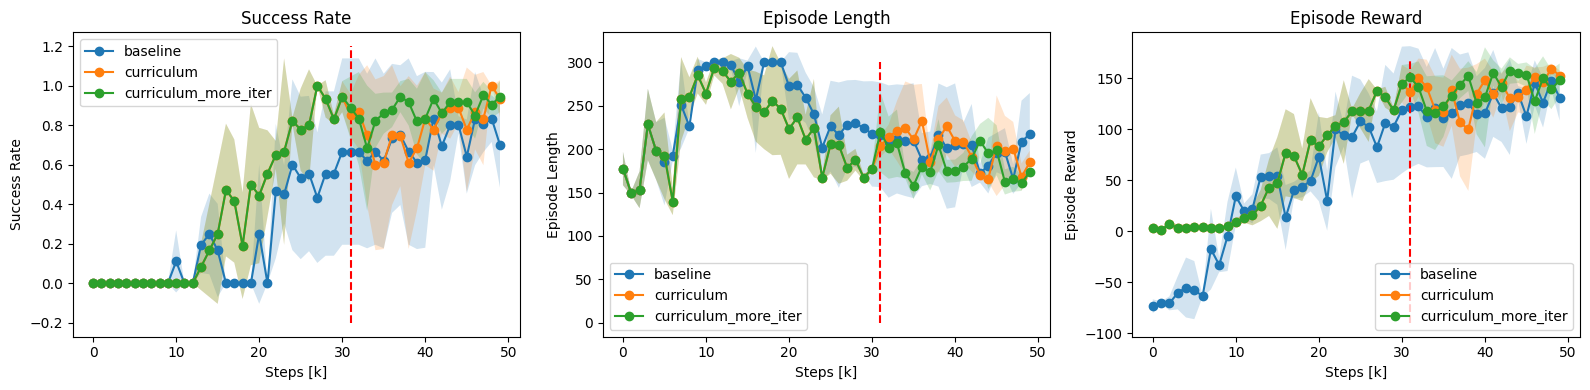

In [56]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))

# Plot success data
axs[0].plot(np.arange(50), normal_data[0].mean(0), marker='o', label='baseline')
axs[0].plot([31,31], [-0.2, 1.2], 'r--')
axs[0].fill_between(np.arange(50), normal_data[0].mean(0) - normal_data[0].std(0), normal_data[0].mean(0) + normal_data[0].std(0), alpha=0.2)
axs[0].plot(np.arange(50), speed_data[0].mean(0), marker='o', label='curriculum')
axs[0].fill_between(np.arange(50), speed_data[0].mean(0) - speed_data[0].std(0), speed_data[0].mean(0) + speed_data[0].std(0), alpha=0.2)
axs[0].plot(np.arange(50), more_iter_after_cr_data[0].mean(0), marker='o', label='curriculum_more_iter')
axs[0].fill_between(np.arange(50), more_iter_after_cr_data[0].mean(0) - more_iter_after_cr_data[0].std(0), more_iter_after_cr_data[0].mean(0) + more_iter_after_cr_data[0].std(0), alpha=0.2)
axs[0].set_xlabel('Steps [k]')
axs[0].set_ylabel('Success Rate')
axs[0].set_title('Success Rate')
axs[0].legend()

# Plot length data
axs[1].plot(np.arange(50), normal_data[1].mean(0), marker='o', label='baseline')
axs[1].plot([31,31], [0, 300], 'r--')
axs[1].fill_between(np.arange(50), normal_data[1].mean(0) - normal_data[1].std(0), normal_data[1].mean(0) + normal_data[1].std(0), alpha=0.2)
axs[1].plot(np.arange(50), speed_data[1].mean(0), marker='o', label='curriculum')
axs[1].fill_between(np.arange(50), speed_data[1].mean(0) - speed_data[1].std(0), speed_data[1].mean(0) + speed_data[1].std(0), alpha=0.2)
axs[1].plot(np.arange(50), more_iter_after_cr_data[1].mean(0), marker='o', label='curriculum_more_iter')
axs[1].fill_between(np.arange(50), more_iter_after_cr_data[1].mean(0) - more_iter_after_cr_data[1].std(0), more_iter_after_cr_data[1].mean(0) + more_iter_after_cr_data[1].std(0), alpha=0.2)
axs[1].set_xlabel('Steps [k]')
axs[1].set_ylabel('Episode Length')
axs[1].set_title('Episode Length')
axs[1].legend()

# Plot reward data
axs[2].plot(np.arange(50), normal_data[2].mean(0), marker='o', label='baseline')
axs[2].plot([31,31], [-90, 170], 'r--')
axs[2].fill_between(np.arange(50), normal_data[2].mean(0) - normal_data[2].std(0), normal_data[2].mean(0) + normal_data[2].std(0), alpha=0.2)
axs[2].plot(np.arange(50), speed_data[2].mean(0), marker='o', label='curriculum')
axs[2].fill_between(np.arange(50), speed_data[2].mean(0) - speed_data[2].std(0), speed_data[2].mean(0) + speed_data[2].std(0), alpha=0.2)
axs[2].plot(np.arange(50), more_iter_after_cr_data[2].mean(0), marker='o', label='curriculum_more_iter')
axs[2].fill_between(np.arange(50), more_iter_after_cr_data[2].mean(0) - more_iter_after_cr_data[2].std(0), more_iter_after_cr_data[2].mean(0) + more_iter_after_cr_data[2].std(0), alpha=0.2)
axs[2].set_xlabel('Steps [k]')
axs[2].set_ylabel('Episode Reward')
axs[2].set_title('Episode Reward')
axs[2].legend()

plt.tight_layout()
plt.show()

In [49]:
def extract_eval_data(run_ids):
    data = []
    episode_lengths = []
    episode_rewards = []

    for run_id in run_ids:
        run = api.run(f'{project}/{run_id}')
        summary = run.summary
        success_rate = summary.get('eval/episode_success')
        episode_length = summary.get('eval/episode_length')
        episode_reward = summary.get('eval/episode_reward')
        data.append(success_rate)
        episode_lengths.append(episode_length)
        episode_rewards.append(episode_reward)

    return data, episode_lengths, episode_rewards

In [50]:
eval_normal_data = extract_eval_data(normal_runs)
eval_speed_data = extract_eval_data(speed_runs)
eval_more_iter_after_cr_data = extract_eval_data(more_iter_after_cr_runs)

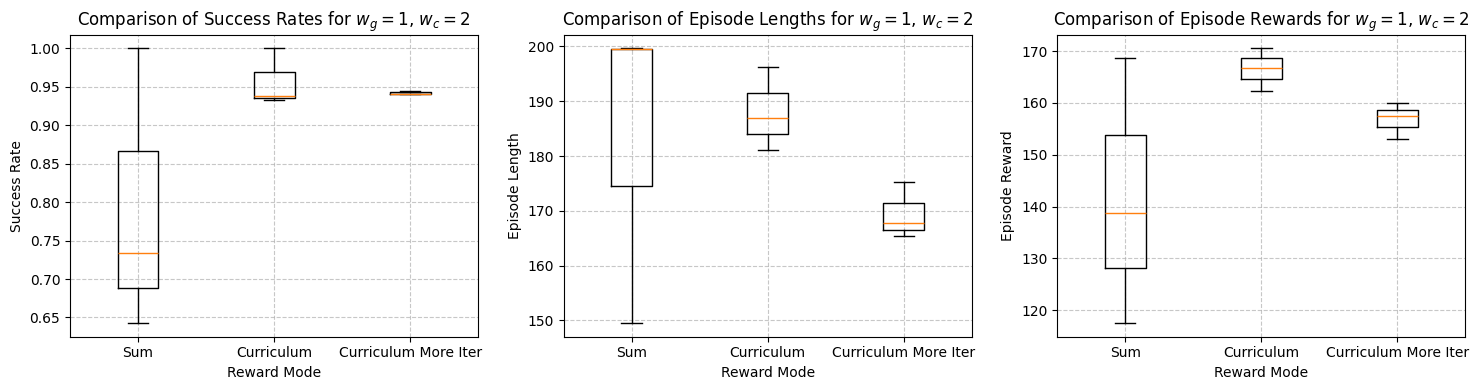

In [51]:
labels = ['Sum', 'Curriculum', 'Curriculum More Iter']
data = [eval_normal_data[0], eval_speed_data[0], eval_more_iter_after_cr_data[0]]
episode_lengths = [eval_normal_data[1], eval_speed_data[1], eval_more_iter_after_cr_data[1]]
episode_rewards = [eval_normal_data[2], eval_speed_data[2], eval_more_iter_after_cr_data[2]]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))

ax1.boxplot(data, tick_labels=labels)
ax1.set_xlabel('Reward Mode')
ax1.set_ylabel('Success Rate')
ax1.set_title('Comparison of Success Rates for $w_g = 1$, $w_c = 2$')
ax1.grid(True, linestyle='--', alpha=0.7)

ax2.boxplot(episode_lengths, tick_labels=labels)
ax2.set_xlabel('Reward Mode')
ax2.set_ylabel('Episode Length')
ax2.set_title('Comparison of Episode Lengths for $w_g = 1$, $w_c = 2$')
ax2.grid(True, linestyle='--', alpha=0.7)

ax3.boxplot(episode_rewards, tick_labels=labels)
ax3.set_xlabel('Reward Mode')
ax3.set_ylabel('Episode Reward')
ax3.set_title('Comparison of Episode Rewards for $w_g = 1$, $w_c = 2$')
ax3.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Curriculum start
Investigate early the curriculum should be switched. Me might be able to connect this with the alpha (entropy) loss of SAC.

In [ ]:
# 20k, 25k, 30k
# TODO td-error prioritized replay buffer

In [9]:
k20_runs = [
    "50stkinj",
    "u1ls9t4d",
    "123oddyg",
]
k25_runs = [
    "7zxwnf9d",
    "lz3yjdya",
    "s4xz6ufe",
]
k30_runs = [
    "gte75lkf",
    "gtsmycp2",
    "u2s7irec",
]  # same as above

In [10]:
k20_data = extract_data(k20_runs, num_samples=50_000)
k25_data = extract_data(k25_runs, num_samples=50_000)
k30_data = extract_data(k30_runs, num_samples=50_000)

k20_data = [np.stack(d, axis=0) for d in k20_data]
k25_data = [np.stack(d, axis=0) for d in k25_data]
k30_data = [np.stack(d, axis=0) for d in k30_data]

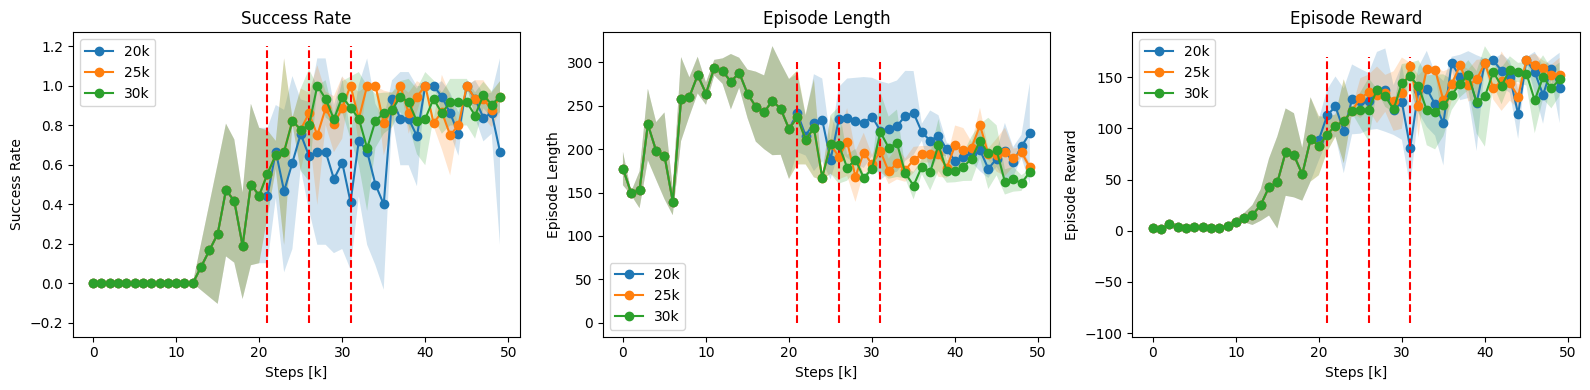

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))

# Plot success data
axs[0].plot(np.arange(50), k20_data[0].mean(0), marker='o', label='20k')
axs[0].plot([21,21], [-0.2, 1.2], 'r--')
axs[0].plot([26,26], [-0.2, 1.2], 'r--')
axs[0].plot([31,31], [-0.2, 1.2], 'r--')
axs[0].fill_between(np.arange(50), k20_data[0].mean(0) - k20_data[0].std(0), k20_data[0].mean(0) + k20_data[0].std(0), alpha=0.2)
axs[0].plot(np.arange(50), k25_data[0].mean(0), marker='o', label='25k')
axs[0].fill_between(np.arange(50), k25_data[0].mean(0) - k25_data[0].std(0), k25_data[0].mean(0) + k25_data[0].std(0), alpha=0.2)
axs[0].plot(np.arange(50), k30_data[0].mean(0), marker='o', label='30k')
axs[0].fill_between(np.arange(50), k30_data[0].mean(0) - k30_data[0].std(0), k30_data[0].mean(0) + k30_data[0].std(0), alpha=0.2)
axs[0].set_xlabel('Steps [k]')
axs[0].set_ylabel('Success Rate')
axs[0].set_title('Success Rate')
axs[0].legend()

# Plot length data
axs[1].plot(np.arange(50), k20_data[1].mean(0), marker='o', label='20k')
axs[1].plot([21,21], [0, 300], 'r--')
axs[1].plot([26,26], [0, 300], 'r--')
axs[1].plot([31,31], [0, 300], 'r--')
axs[1].fill_between(np.arange(50), k20_data[1].mean(0) - k20_data[1].std(0), k20_data[1].mean(0) + k20_data[1].std(0), alpha=0.2)
axs[1].plot(np.arange(50), k25_data[1].mean(0), marker='o', label='25k')
axs[1].fill_between(np.arange(50), k25_data[1].mean(0) - k25_data[1].std(0), k25_data[1].mean(0) + k25_data[1].std(0), alpha=0.2)
axs[1].plot(np.arange(50), k30_data[1].mean(0), marker='o', label='30k')
axs[1].fill_between(np.arange(50), k30_data[1].mean(0) - k30_data[1].std(0), k30_data[1].mean(0) + k30_data[1].std(0), alpha=0.2)
axs[1].set_xlabel('Steps [k]')
axs[1].set_ylabel('Episode Length')
axs[1].set_title('Episode Length')
axs[1].legend()

# Plot reward data
axs[2].plot(np.arange(50), k20_data[2].mean(0), marker='o', label='20k')
axs[2].plot([21,21], [-90, 170], 'r--')
axs[2].plot([26,26], [-90, 170], 'r--')
axs[2].plot([31,31], [-90, 170], 'r--')
axs[2].fill_between(np.arange(50), k20_data[2].mean(0) - k20_data[2].std(0), k20_data[2].mean(0) + k20_data[2].std(0), alpha=0.2)
axs[2].plot(np.arange(50), k25_data[2].mean(0), marker='o', label='25k')
axs[2].fill_between(np.arange(50), k25_data[2].mean(0) - k25_data[2].std(0), k25_data[2].mean(0) + k25_data[2].std(0), alpha=0.2)
axs[2].plot(np.arange(50), k30_data[2].mean(0), marker='o', label='30k')
axs[2].fill_between(np.arange(50), k30_data[2].mean(0) - k30_data[2].std(0), k30_data[2].mean(0) + k30_data[2].std(0), alpha=0.2)
axs[2].set_xlabel('Steps [k]')
axs[2].set_ylabel('Episode Reward')
axs[2].set_title('Episode Reward')
axs[2].legend()

plt.tight_layout()
plt.show()

It seems like the ideal time to switch the curriculum is related to the policy entropy. When the entropy is low for a certain amount of time, a new stage can be introduced.
Note that the reward function here is
$$R=r_{goal}+r{d,goal}+r_{speed}+k(r_{collision}+r_{d,track}+r_{acc})$$
For this formulation, a curriculum works well. If it is changed it is not so obvious and sample efficiency in generally drops. It would be interesting to find out how terms are optimally combined and introduced.